<a href="https://colab.research.google.com/github/alf108/BME450-Ultrasound-Image-Pregnancy-Analyzer/blob/main/450_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cpu


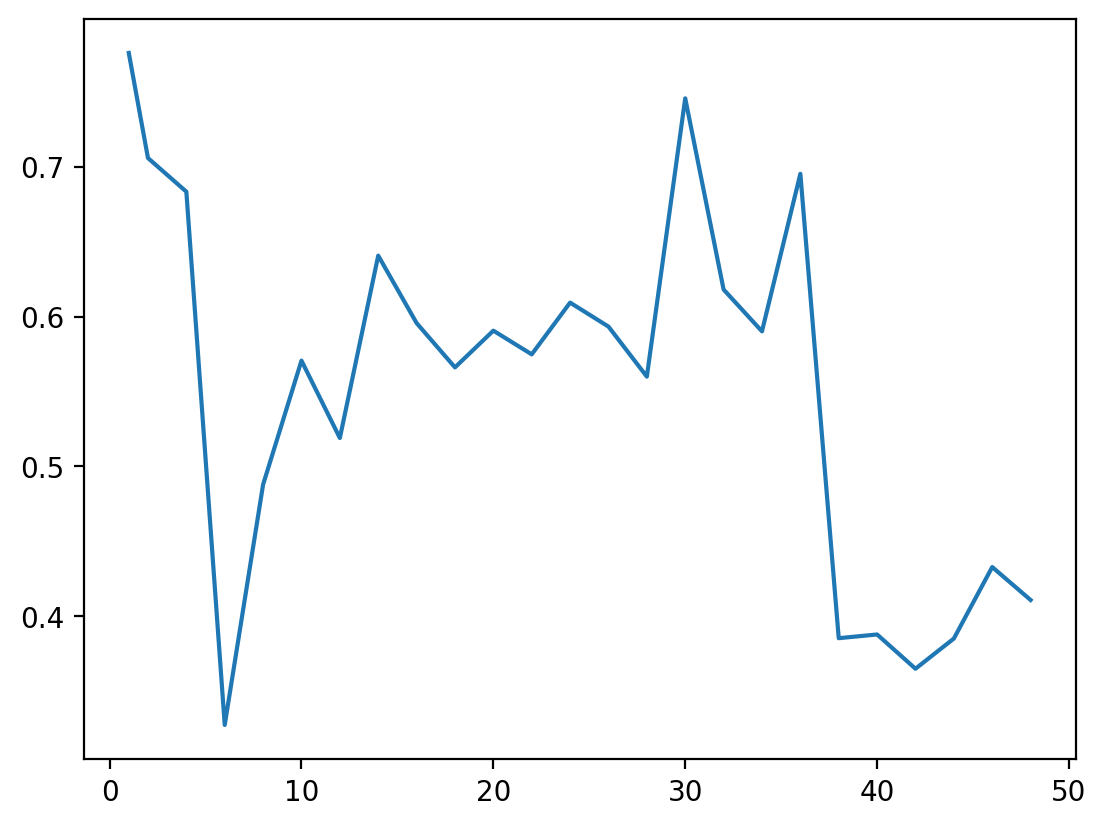

Using 6 threads


FileNotFoundError: ignored

In [ ]:
#imports
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import torch
import torchvision
import timeit
from torchvision import datasets, transforms

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

runtimes = []
threads = [1] + [t for t in range(2, 49, 2)]
for t in threads:
    torch.set_num_threads(t)
    r = timeit.timeit(setup = "import torch; x = torch.randn(1024, 1024); y = torch.randn(1024, 1024)", stmt="torch.mm(x, y)", number=5)
    runtimes.append(r)
    

plt.plot(threads,runtimes)
plt.show()
min_value = min(runtimes)
min_index = runtimes.index(min_value)
torch.set_num_threads(threads[min_index])
print(f'Using {threads[min_index]} threads')

#batch_size for training data
batch_size = 90
#directory of training data set
data_dir = '/content/drive/MyDrive/Pregnant_NotPregnant_dataset/train'

#transforming training images to tensors
transform = transforms.Compose([transforms.Resize(256),
transforms.CenterCrop(256),
transforms.ToTensor()])
#creating training data set and loading in images
trainset = datasets.ImageFolder(data_dir, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
images, labels = next(iter(trainloader))

#batchsize for testing data
batch_size2 = 10
#directory of test dataset
data_dir2 = '/content/drive/MyDrive/Pregnant_NotPregnant_dataset/test'
#transfroming dataset into tensors
transform2 = transforms.Compose([transforms.Resize(256),
transforms.CenterCrop(256),
transforms.ToTensor()])
#loading in test data
testset = datasets.ImageFolder(data_dir2, transform=transform2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size2, shuffle=True)
images, labels = next(iter(testloader))
#creating classes
classes = ('Not Pregnant', 'Pregnant')
#imports
import matplotlib.pyplot as plt
import numpy as np

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
import torch.nn as nn
import torch.nn.functional as F

#create convolutional neural network class
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(59536, 200)
        self.fc2 = nn.Linear(200, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
Loss = []
Loss2 = []
Count = []
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.003, momentum=0.9)

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    running_loss2 = 0.0
    for i, data in enumerate(trainloader, 0):

        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    Loss.append(running_loss)
    for i, data in enumerate(testloader, 0):

        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss2 += loss.item()
    Loss2.append(running_loss2)
 
dataiter = iter(testloader)
images, labels = next(dataiter)

outputs = net(images)
_, predicted = torch.max(outputs, 1)

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'\nAccuracy of the network on the {batch_size2} test images: {100 * correct // total} %')

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'\nAccuracy for class: {classname:5s} is {accuracy:.1f} %')

fig, ax = plt.subplots()
ax.plot(range(len(Loss)),Loss, label = 'Training Loss')
ax.plot(range(len(Loss2)),Loss2, label = 'Validation Loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Loss Plot")
ax.legend()
plt.show()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [ ]:
print(Count)